<a href="https://colab.research.google.com/github/s10950026/bigdata/blob/main/0323_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(SportsAnalytics)

In [6]:
library(ggplot2)

In [7]:
NBA1920 <- fetch_NBAPlayerStatistics("19-20")

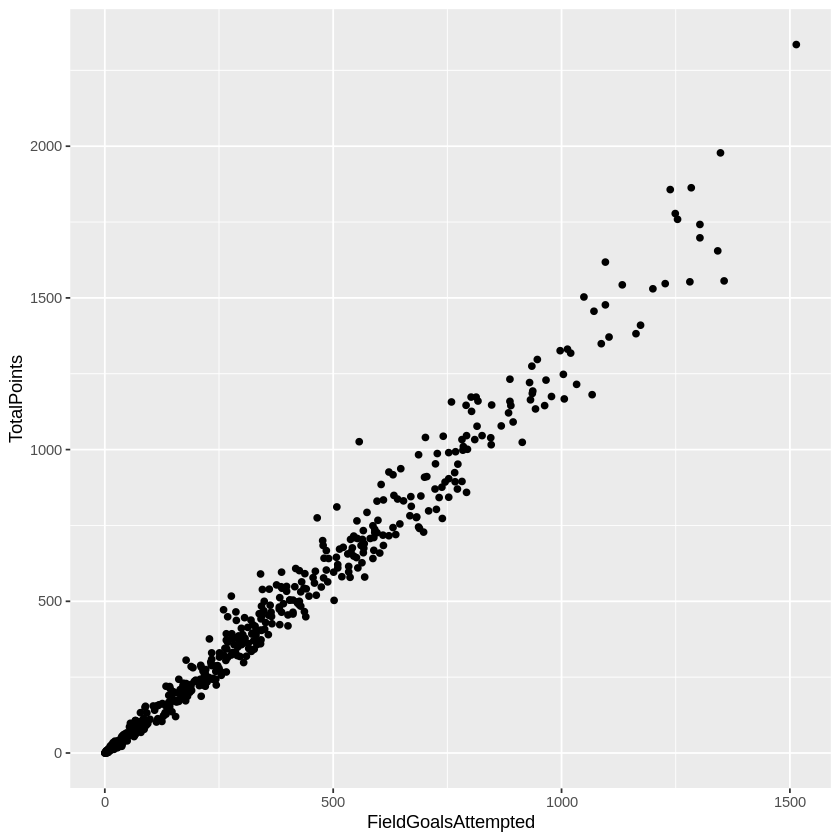

In [8]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1920)

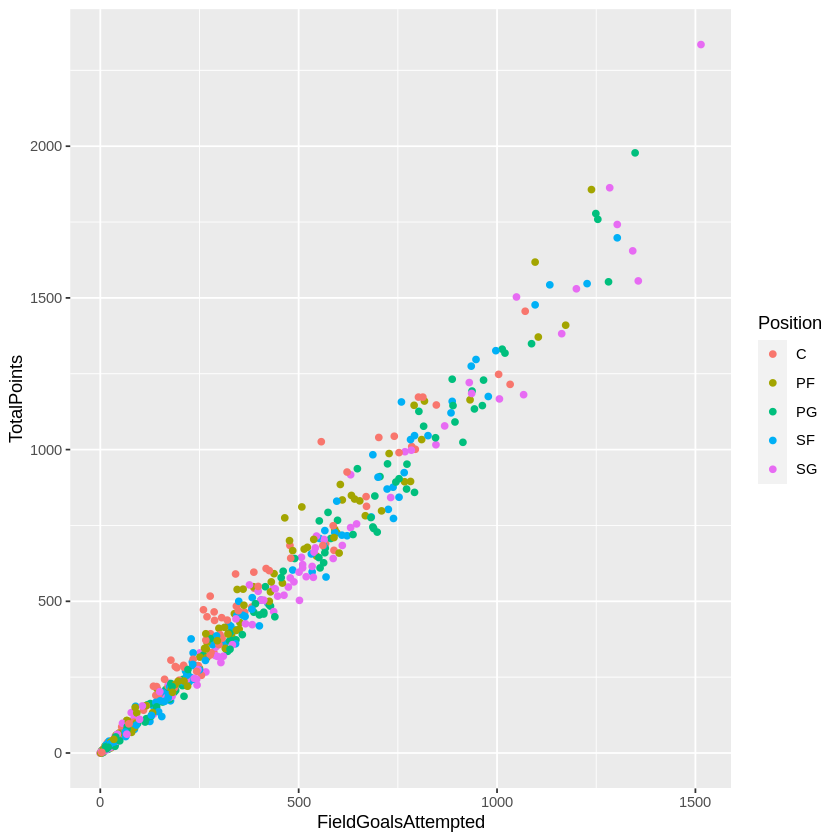

In [9]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1920,color=Position)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



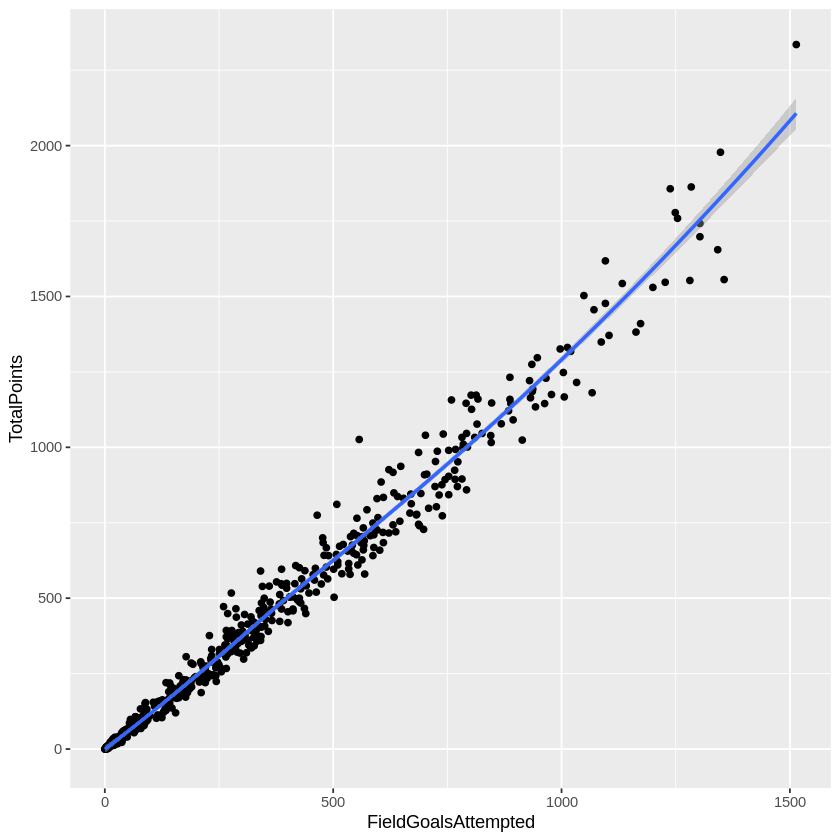

In [10]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1920,geom=c("point","smooth"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



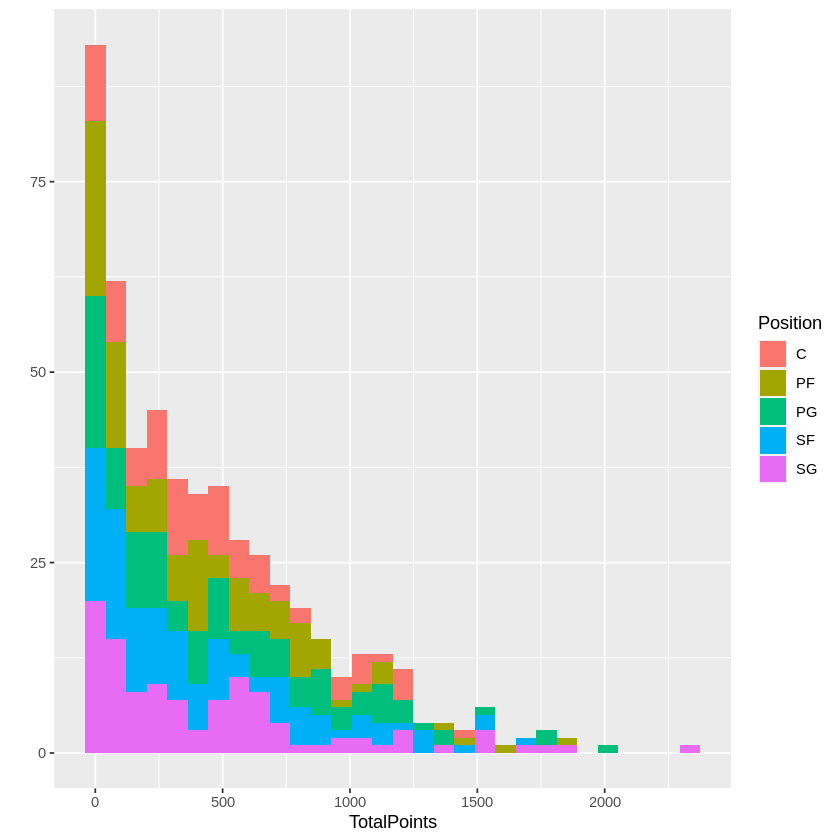

In [12]:
qplot(TotalPoints,data=NBA1920,fill=Position)

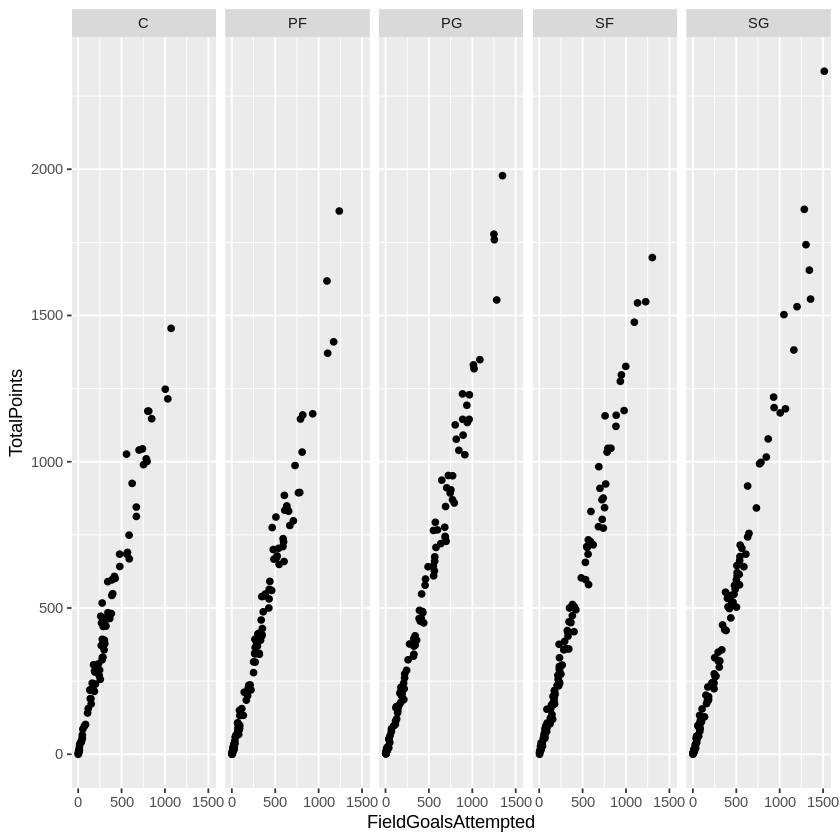

In [13]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1920,facets=.~Position)

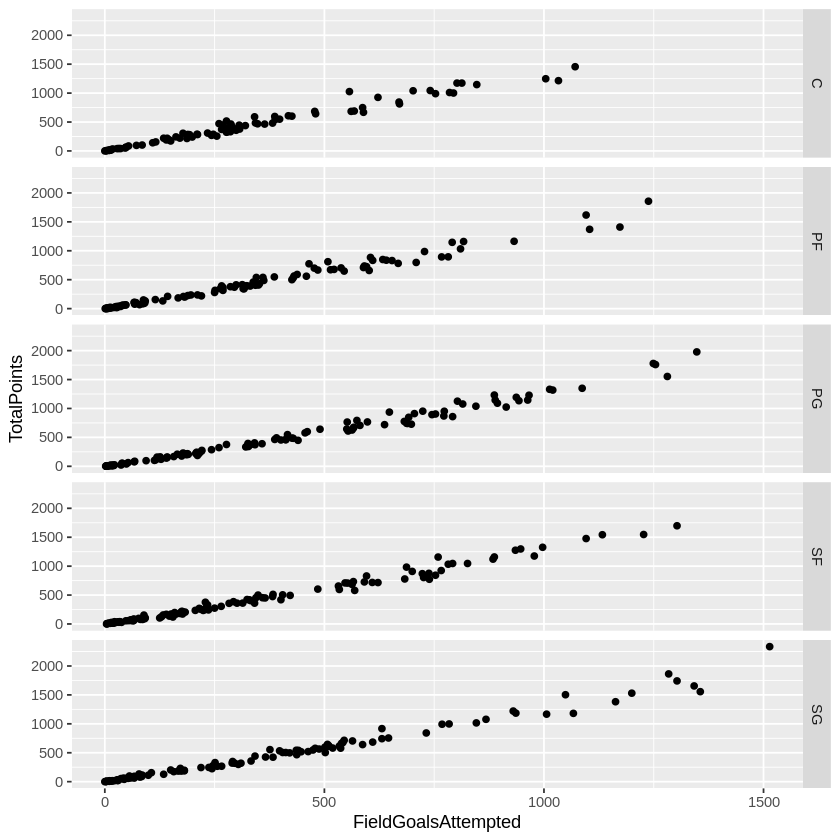

In [14]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1920,facets=Position~.)

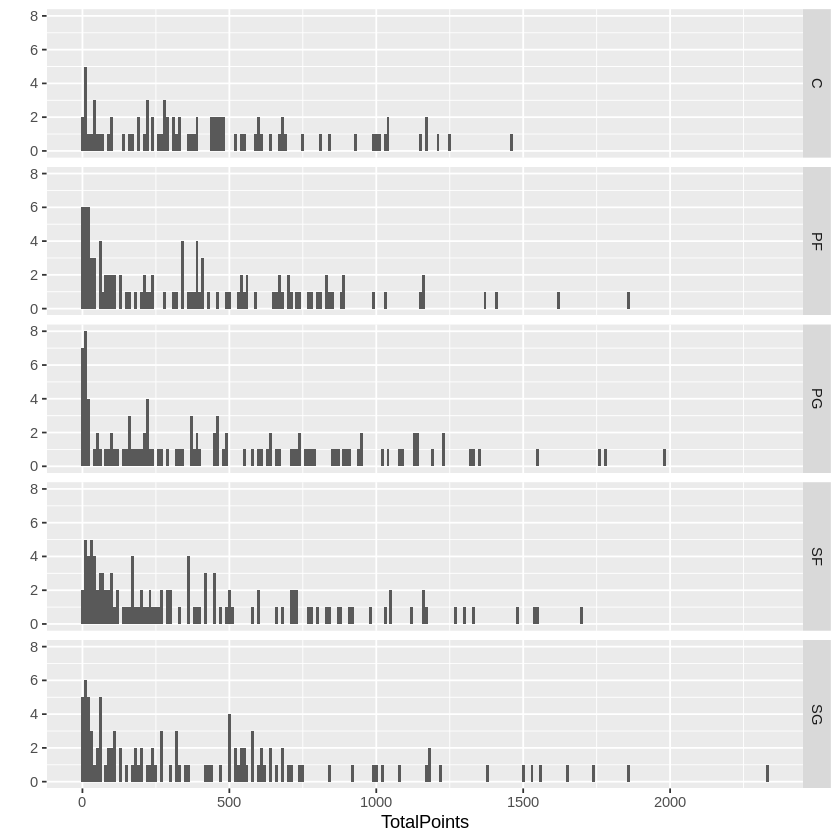

In [15]:
qplot(TotalPoints,data=NBA1920,facets=Position~.,binwidth=10)

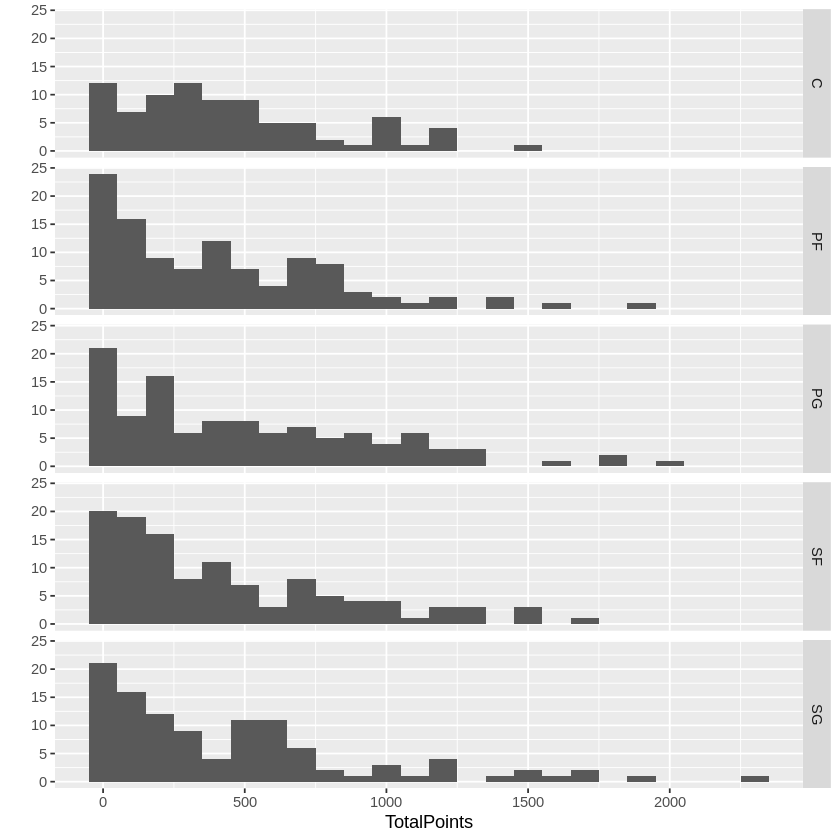

In [16]:
qplot(TotalPoints,data=NBA1920,facets=Position~.,binwidth=100)

In [17]:
library(ggplot2)

In [18]:
df <- data.frame(gp=factor(rep(letters[1:3],each=10)),y=rnorm(30))

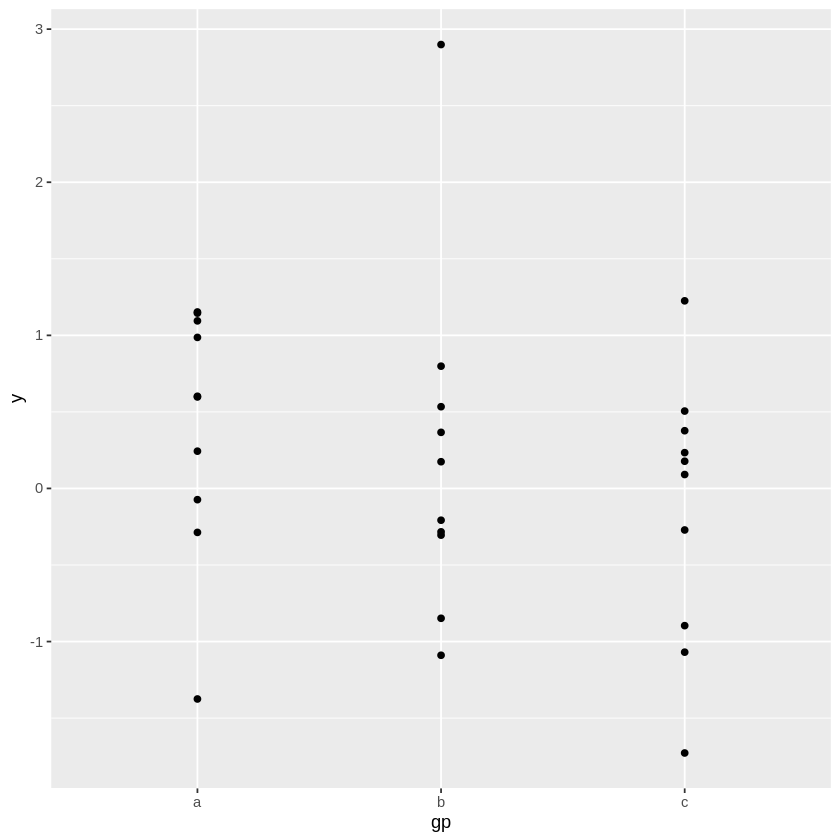

In [19]:
ggplot(df,aes(x=gp,y=y))+geom_point()

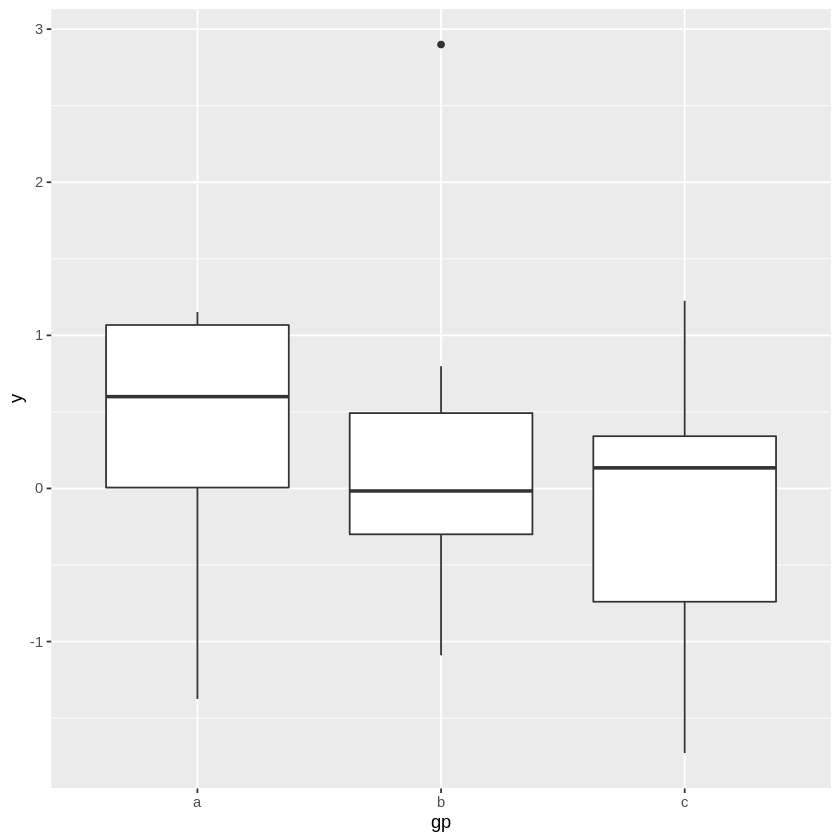

In [20]:
ggplot(df,aes(x=gp,y=y))+geom_boxplot()

In [21]:
df$z<-df$y+rnorm(30)

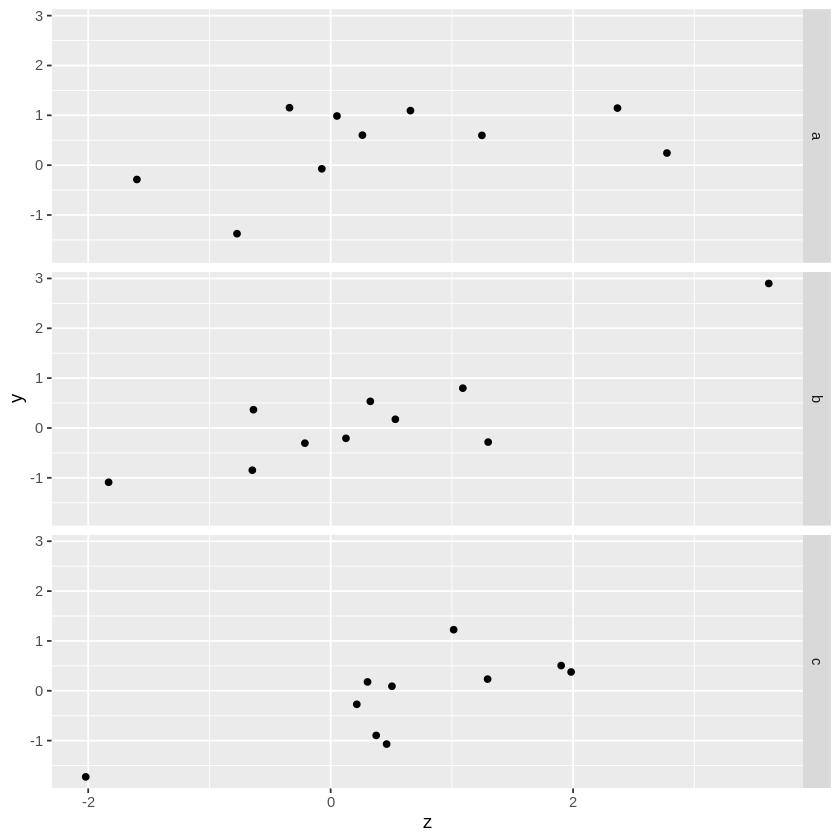

In [22]:
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)

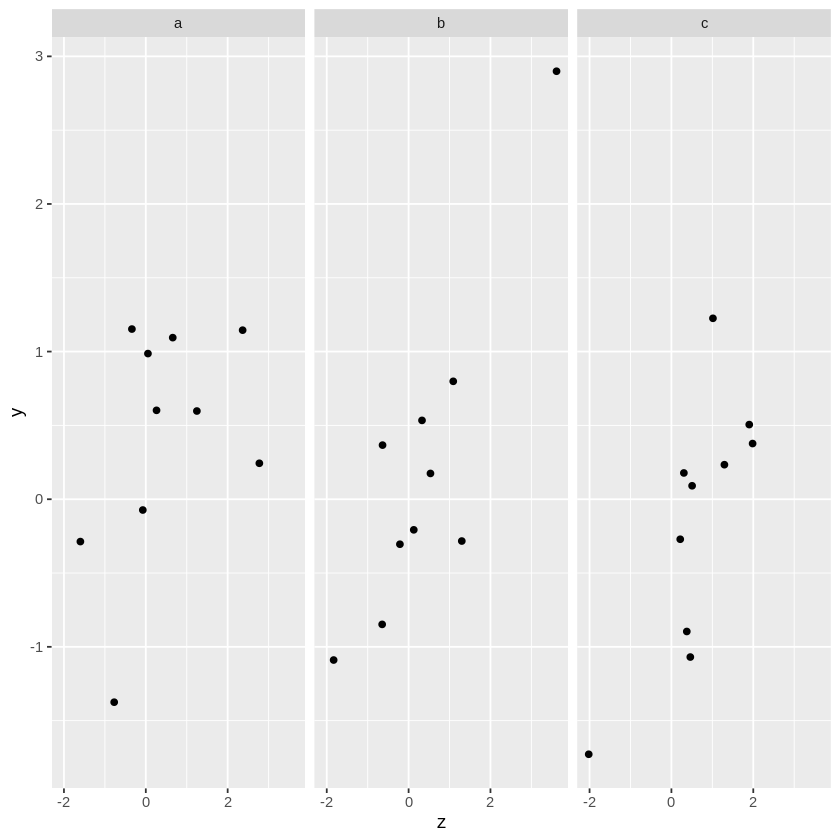

In [23]:
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



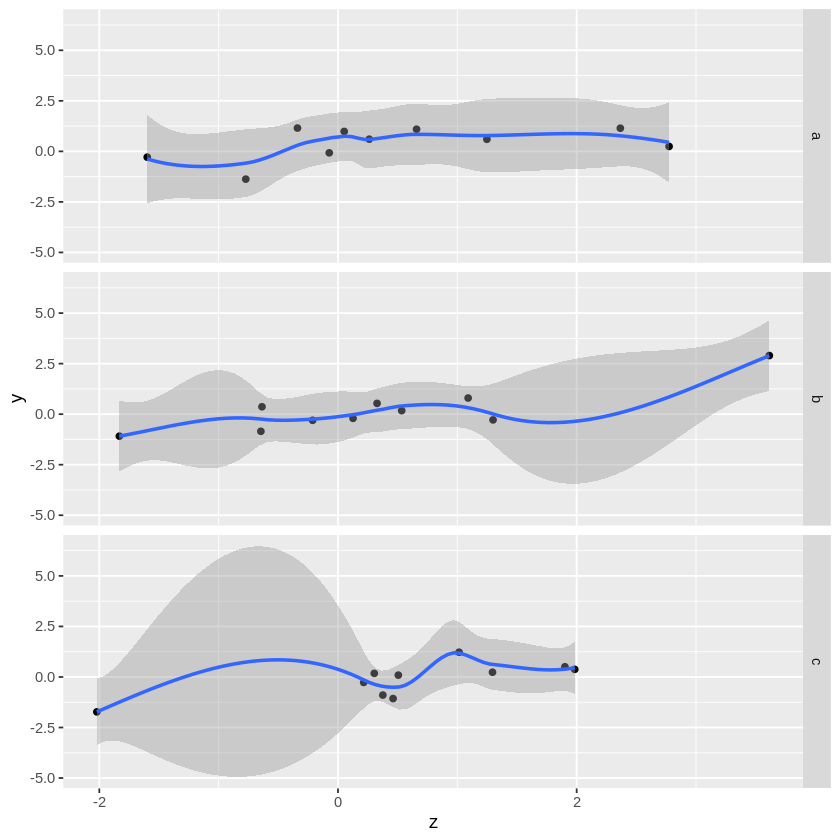

In [24]:
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)+geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



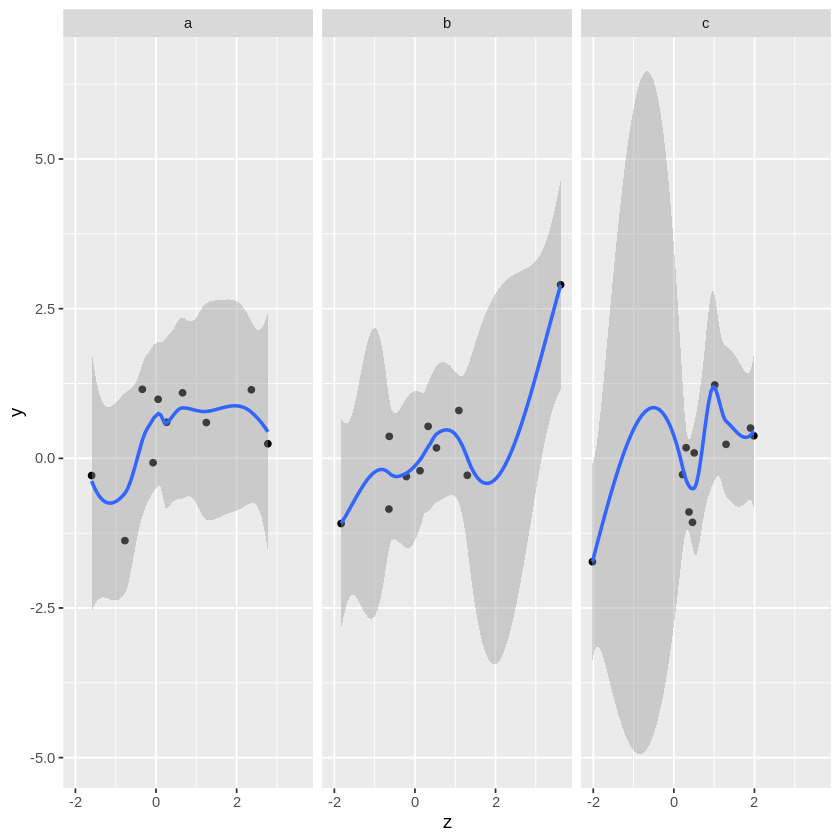

In [25]:
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)+geom_smooth()

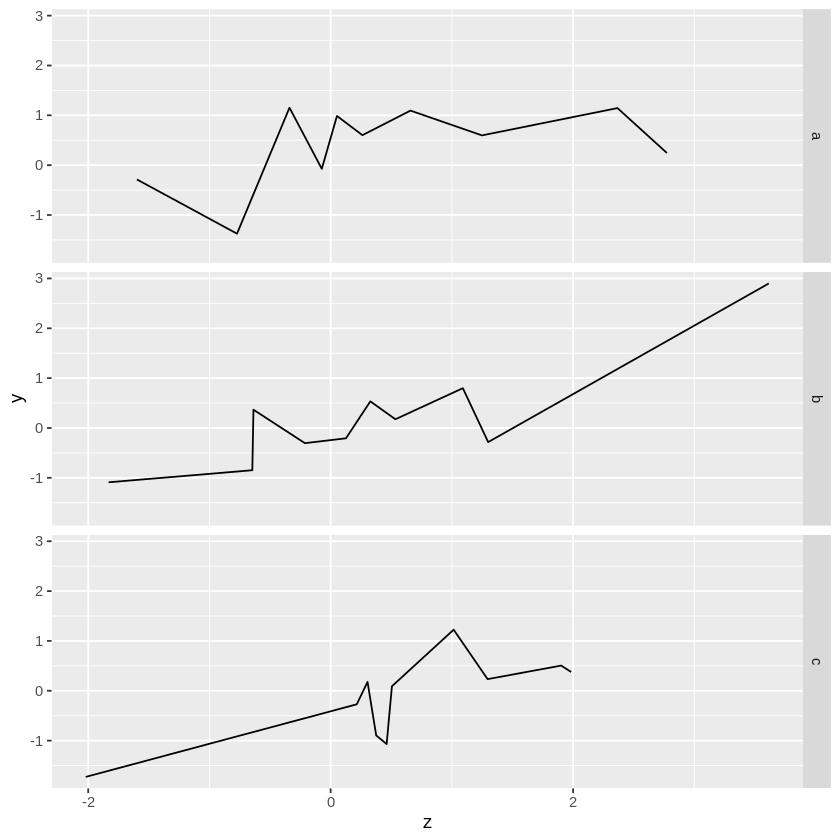

In [26]:
ggplot(df,aes(x=z,y=y))+geom_line()+facet_grid(gp~.)

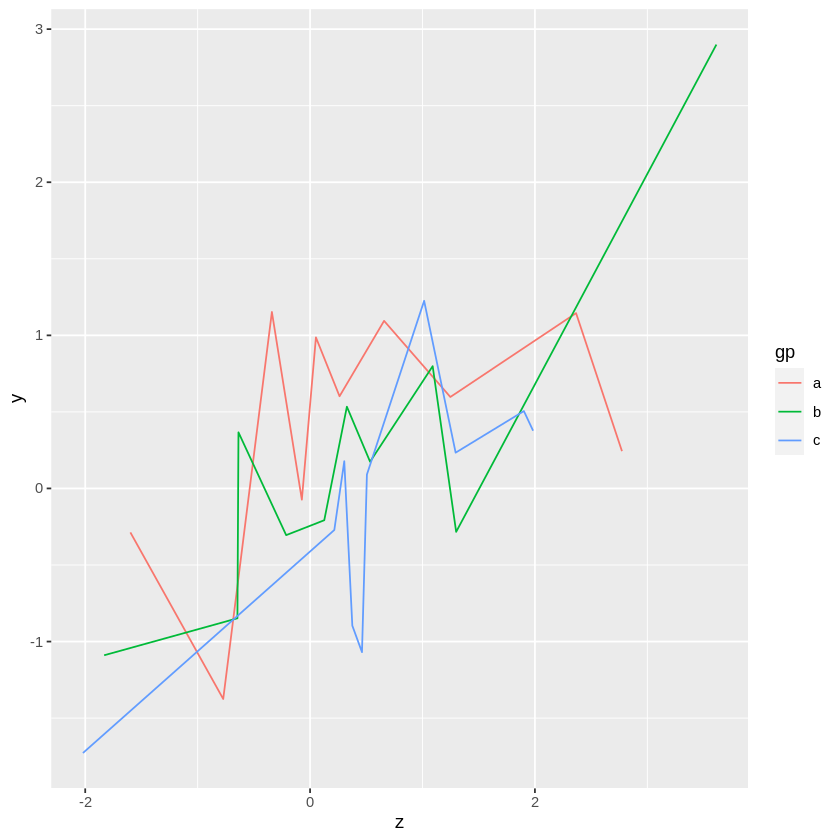

In [27]:
ggplot(df,aes(x=z,y=y,color=gp))+geom_line()

In [28]:
install.packages("datasets")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [29]:
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
library(datasets)
library(data.table)

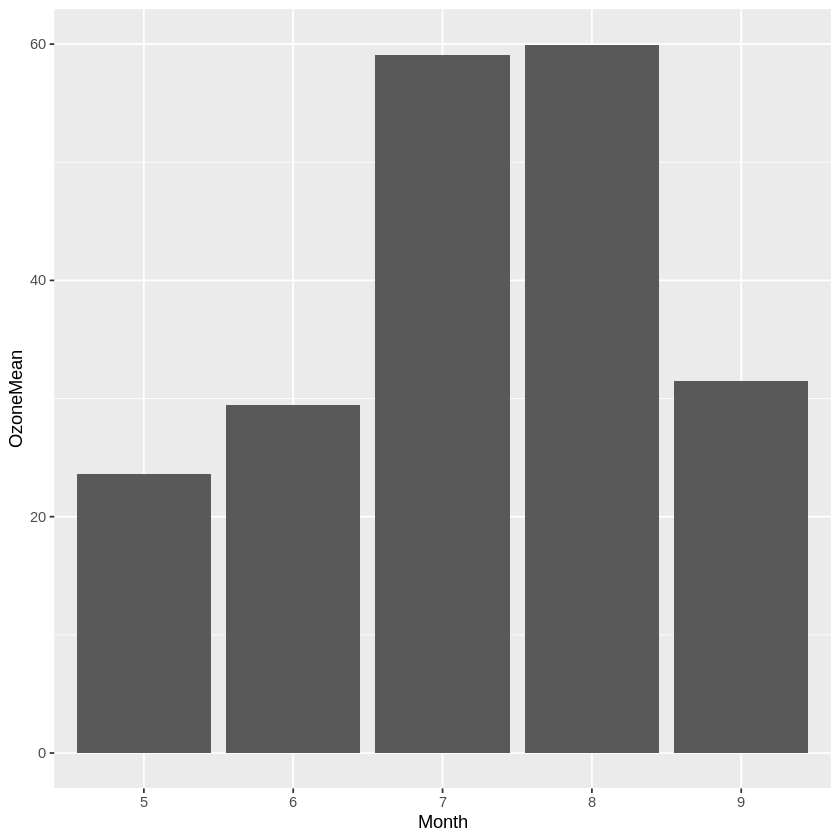

In [31]:
airquality$Month<-as.factor(airquality$Month)
airquality.mean<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm=T)),by=Month]
ggplot()+geom_bar(data=airquality.mean,aes(x=Month,y=OzoneMean),stat="identity")

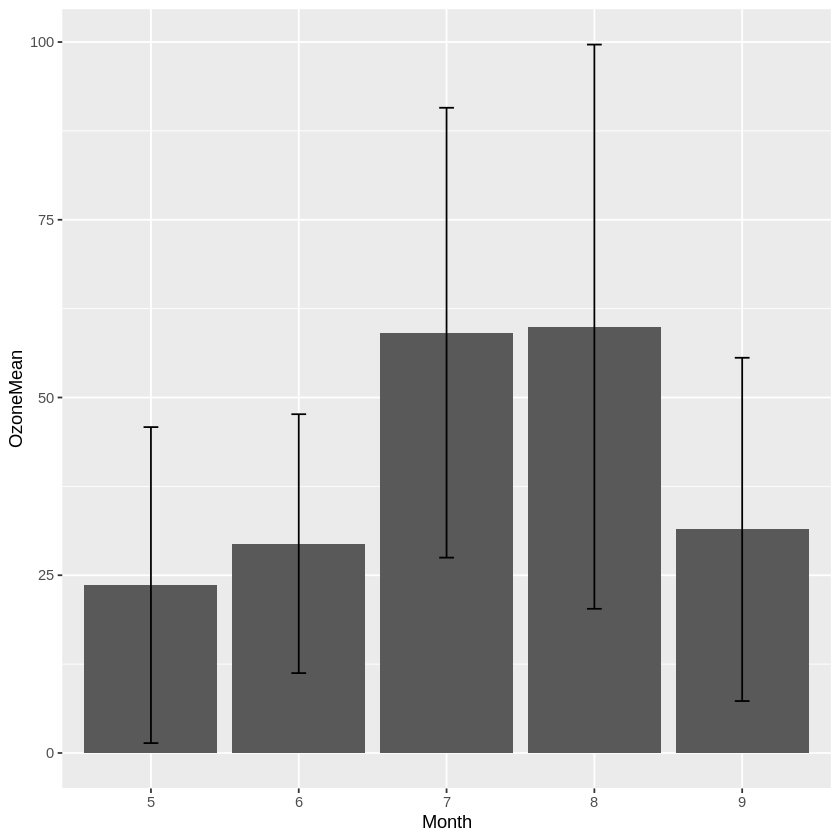

In [32]:
library(datasets)
library(data.table)
airquality$Month<-as.factor(airquality$Month)
airquality.stat<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm=T),OzoneSD=sd(Ozone,na.rm=T)),by=Month]
ggplot(data=airquality.stat)+geom_bar(aes(x=Month,y=OzoneMean),stat="identity")+geom_errorbar(aes(x=Month,ymin=OzoneMean-OzoneSD,ymax=OzoneMean+OzoneSD),width=.1)